## Model Building using Logistic Regression and Decision Tree and Random Forest on Employee Attrition Dataset

### 1.Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2.Importing the dataset

In [2]:
df = pd.read_csv("Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 3.Checking for Null Values

In [7]:
df.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [8]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [10]:
df.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [11]:
df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [12]:
df.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [13]:
df.EmployeeNumber.value_counts()

1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

In [14]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis= 1, inplace=True)

In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### 4.Data Visualization

<AxesSubplot: xlabel='Attrition', ylabel='count'>

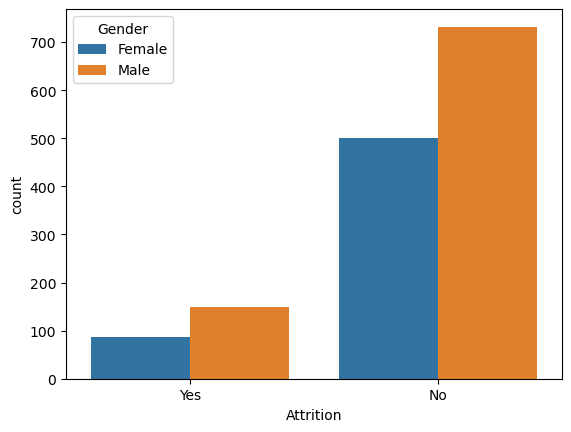

In [16]:
sns.countplot(x='Attrition',data=df,hue = 'Gender')

Text(0.5, 0, 'PerformanceRating')

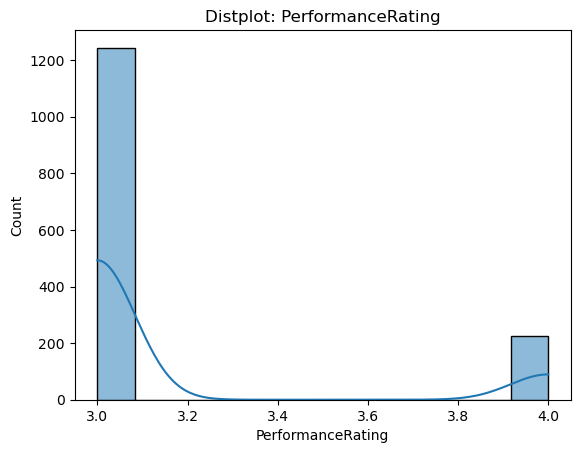

In [17]:
sns.histplot(df["PerformanceRating"], kde=True)
plt.title("Distplot: PerformanceRating")
plt.xlabel("PerformanceRating")

<AxesSubplot: ylabel='Department'>

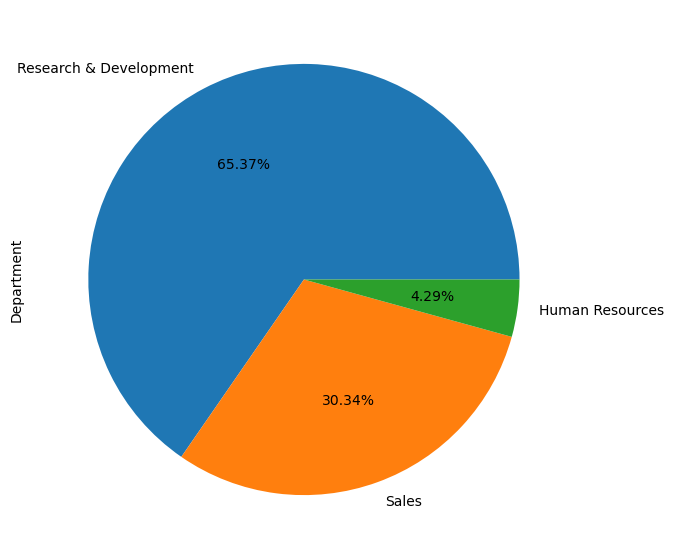

In [18]:
df['Department'].value_counts().plot(kind='pie',figsize=(7,7),autopct="%0.2f%%")

In [19]:
corr=df.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot: >

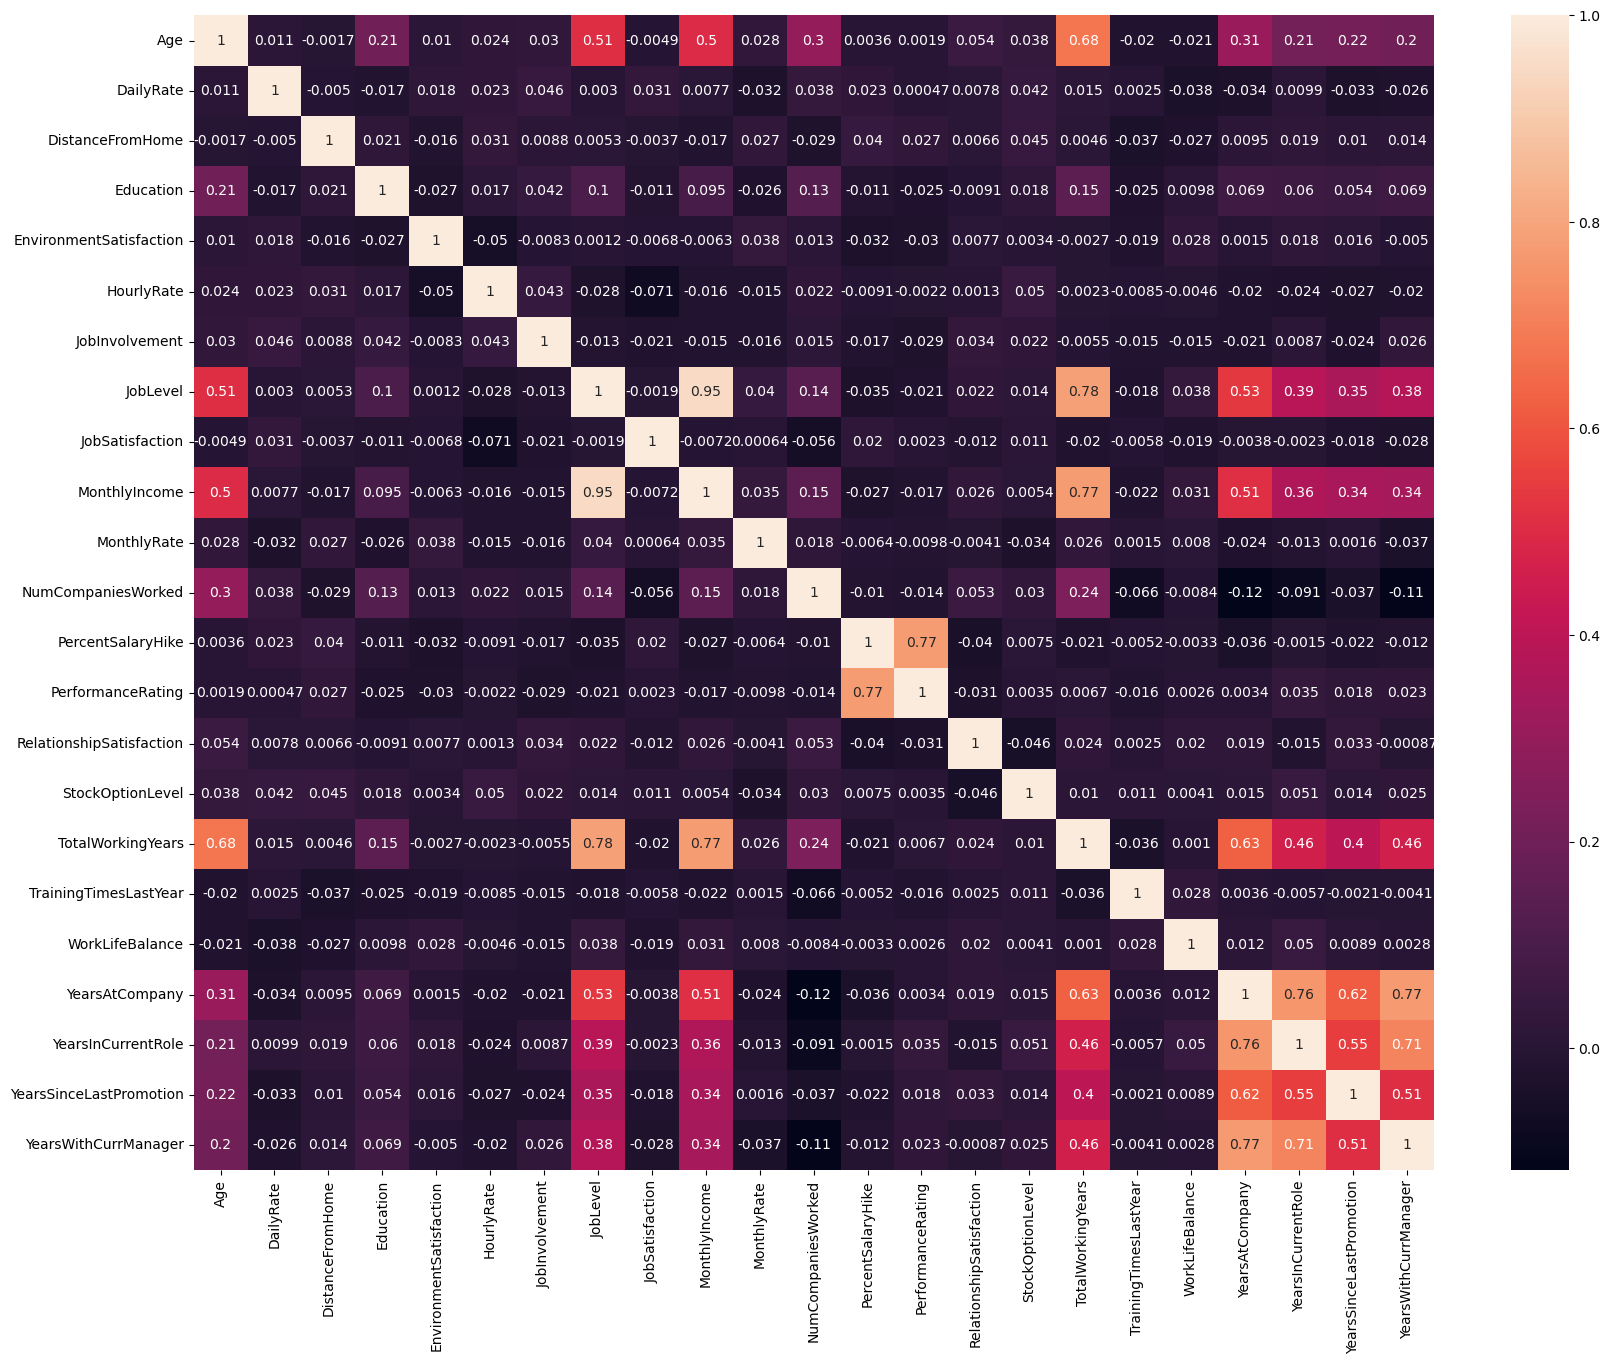

In [20]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

<AxesSubplot: >

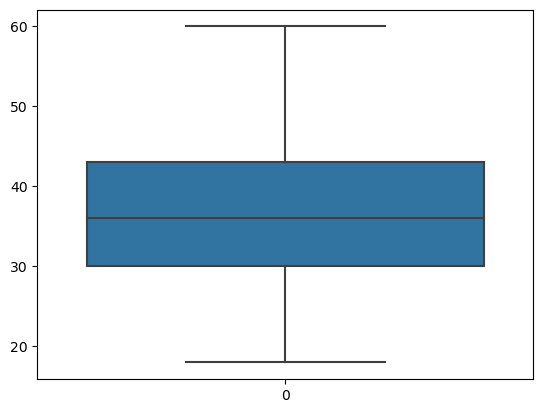

In [21]:
sns.boxplot(df.Age)

<AxesSubplot: >

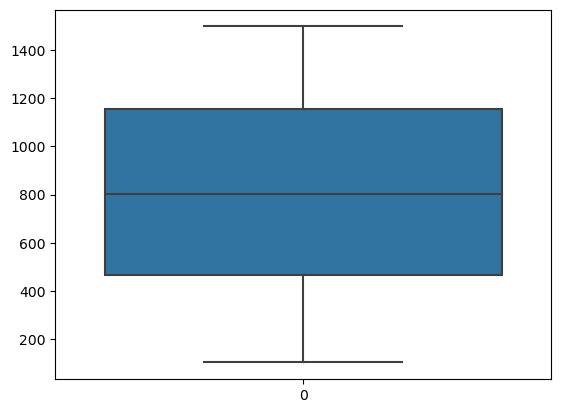

In [22]:
sns.boxplot(df.DailyRate)

<AxesSubplot: >

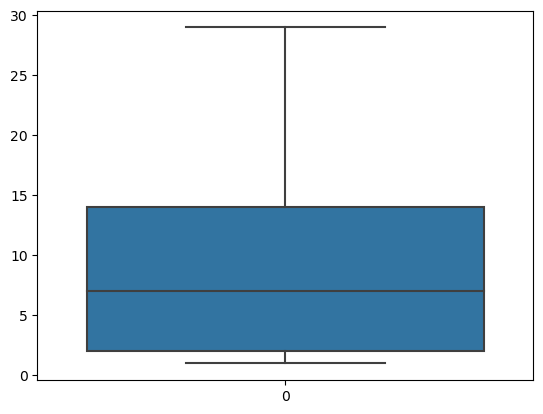

In [23]:
sns.boxplot(df.DistanceFromHome)

<AxesSubplot: >

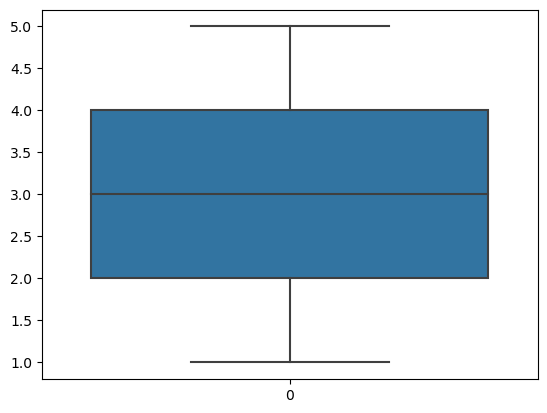

In [24]:
sns.boxplot(df.Education)

<AxesSubplot: >

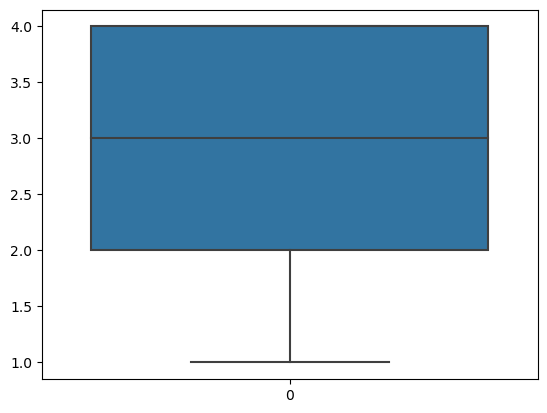

In [25]:
sns.boxplot(df.EnvironmentSatisfaction)

<AxesSubplot: >

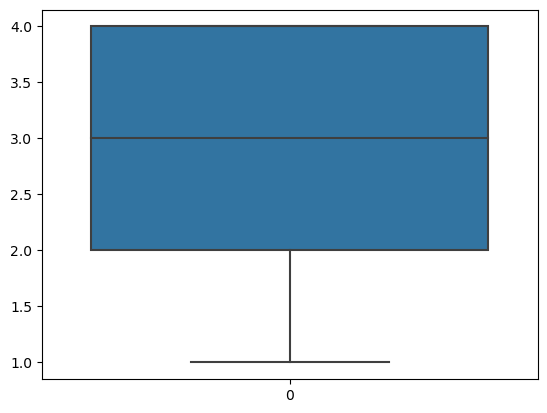

In [26]:
sns.boxplot(df.EnvironmentSatisfaction)

<AxesSubplot: >

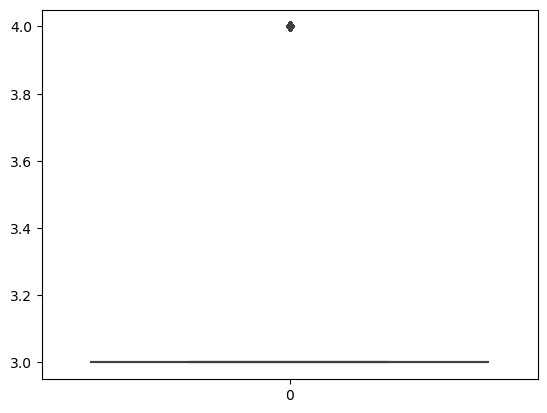

In [27]:
sns.boxplot(df.PerformanceRating)

In [28]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


<AxesSubplot: >

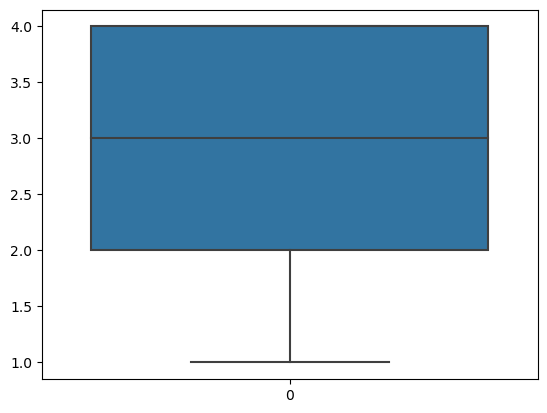

In [29]:
sns.boxplot(df.RelationshipSatisfaction)

<AxesSubplot: >

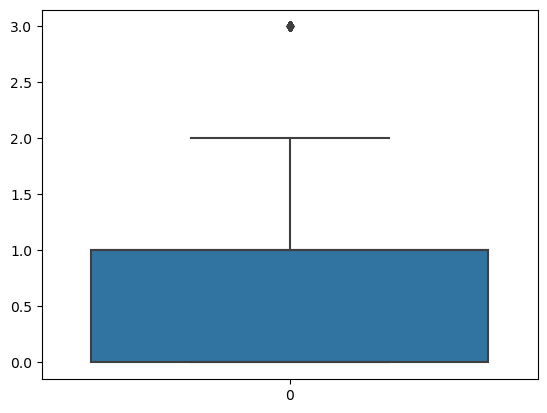

In [30]:
sns.boxplot(df.StockOptionLevel)

<AxesSubplot: >

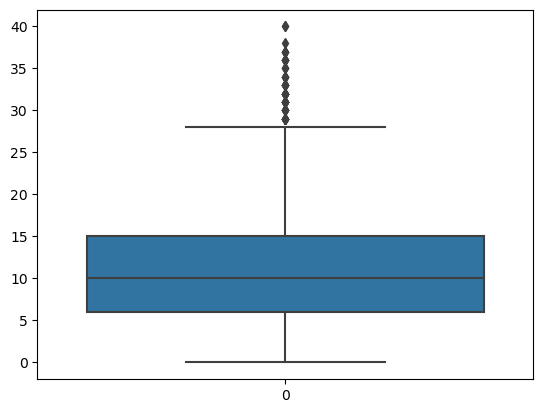

In [31]:
sns.boxplot(df.TotalWorkingYears)

<AxesSubplot: >

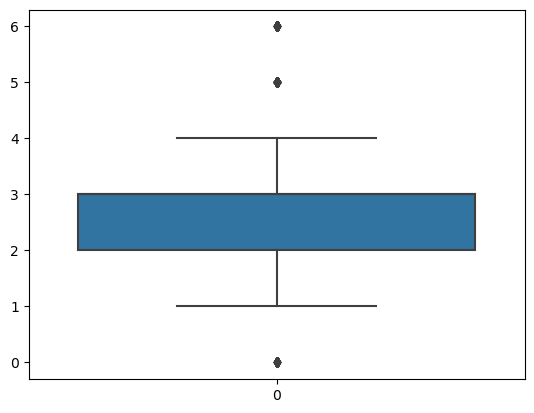

In [32]:
sns.boxplot(df.TrainingTimesLastYear)

<AxesSubplot: >

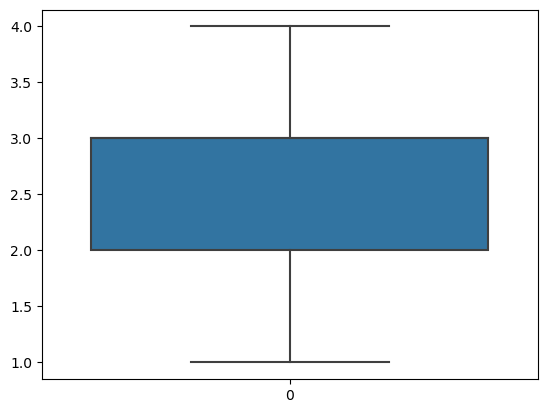

In [33]:
sns.boxplot(df.WorkLifeBalance)

<AxesSubplot: >

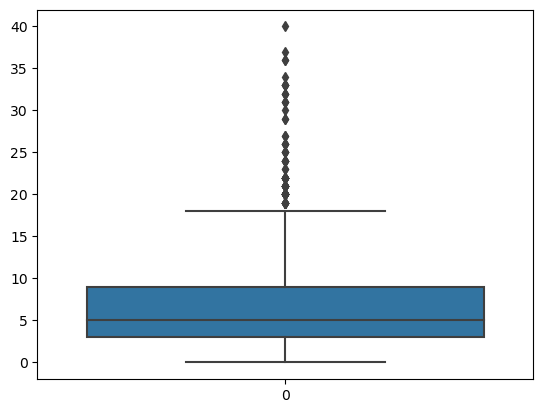

In [34]:
sns.boxplot(df.YearsAtCompany)

<AxesSubplot: >

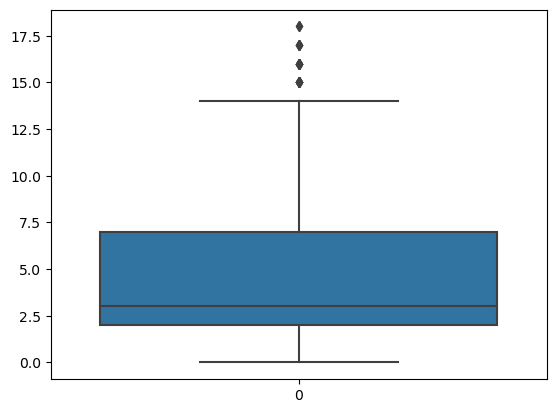

In [35]:
sns.boxplot(df.YearsInCurrentRole)

<AxesSubplot: >

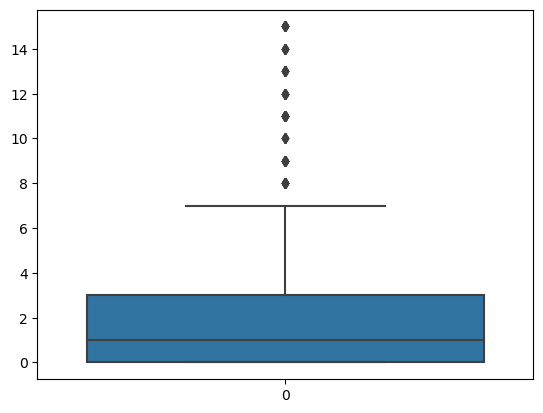

In [36]:
sns.boxplot(df.YearsSinceLastPromotion)

<AxesSubplot: >

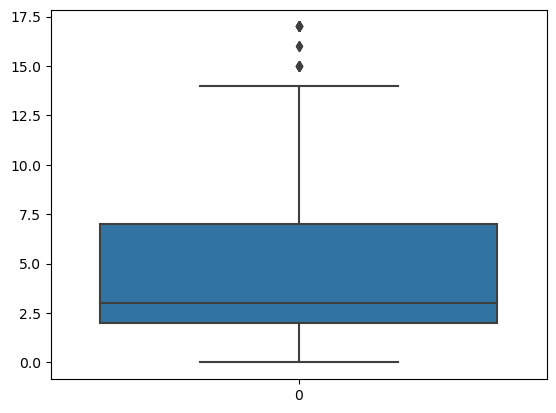

In [37]:
sns.boxplot(df.YearsWithCurrManager)

### 5.Outlier Detection

In [38]:
df.median()

/var/folders/0v/08pwzd_50gqdy5d2ttp9zbqc0000gn/T/ipykernel_19148/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Age                            36.0
DailyRate                     802.0
DistanceFromHome                7.0
Education                       3.0
EnvironmentSatisfaction         3.0
HourlyRate                     66.0
JobInvolvement                  3.0
JobLevel                        2.0
JobSatisfaction                 3.0
MonthlyIncome                4919.0
MonthlyRate                 14235.5
NumCompaniesWorked              2.0
PercentSalaryHike              14.0
PerformanceRating               3.0
RelationshipSatisfaction        3.0
StockOptionLevel                1.0
TotalWorkingYears              10.0
TrainingTimesLastYear           3.0
WorkLifeBalance                 3.0
YearsAtCompany                  5.0
YearsInCurrentRole              3.0
YearsSinceLastPromotion         1.0
YearsWithCurrManager            3.0
dtype: float64

### Handling Outliers on TotalWorkingYears Column

In [63]:
q1 = df.TotalWorkingYears.quantile(0.25)
q3 = df.TotalWorkingYears.quantile(0.75)
print(q1)
print(q3)

6.0
10.0


In [64]:
IQR = q3-q1
print(IQR)

4.0


In [65]:
upper_limit = q3+1.5*IQR
print(upper_limit)

16.0


In [66]:
# replacing with median
df['TotalWorkingYears'] = np.where(df['TotalWorkingYears']>upper_limit,10,df['TotalWorkingYears'])

<AxesSubplot: >

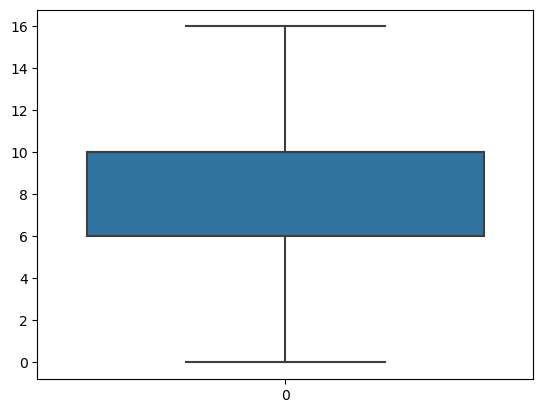

In [67]:
sns.boxplot(df.TotalWorkingYears)

### Handling Outliers on YearsSinceLastPromotion Column

In [73]:
q11 = df.YearsSinceLastPromotion.quantile(0.25)
q31 = df.YearsSinceLastPromotion.quantile(0.75)
print(q11)
print(q31)

0.0
1.0


In [74]:
IQR1 = q31-q11
print(IQR1)

1.0


In [75]:
upper_limit = q31+1.5*IQR1
print(upper_limit)

2.5


In [76]:
# replacing with median
df['YearsSinceLastPromotion'] = np.where(df['YearsSinceLastPromotion']>upper_limit,1,df['YearsSinceLastPromotion'])

<AxesSubplot: >

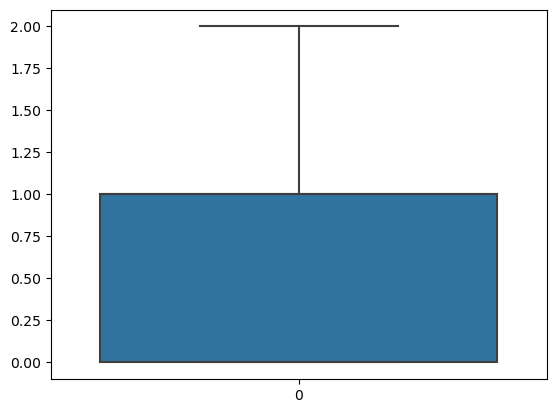

In [77]:
sns.boxplot(df.YearsSinceLastPromotion)

### Handling Outliers on YearsWithCurrManager Column

In [78]:
q12 = df.YearsWithCurrManager.quantile(0.25)
q32 = df.YearsWithCurrManager.quantile(0.75)
print(q12)
print(q32)

2.0
7.0


In [79]:
IQR2 = q32-q12
print(IQR2)

5.0


In [80]:
upper_limit = q32+1.5*IQR2
print(upper_limit)

14.5


In [81]:
# replacing with median
df['YearsWithCurrManager'] = np.where(df['YearsWithCurrManager']>upper_limit,3,df['YearsWithCurrManager'])

<AxesSubplot: >

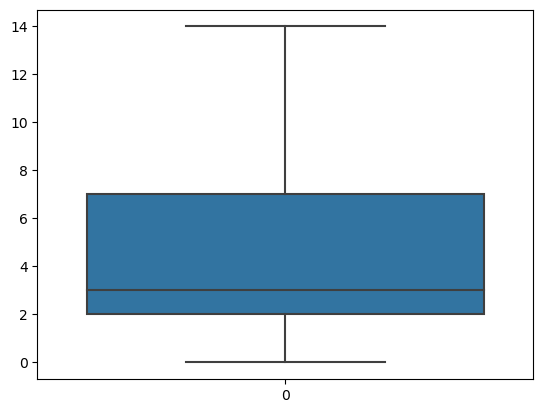

In [82]:
sns.boxplot(df.YearsWithCurrManager)

### Handling Outliers on YearsAtCompany Column

In [87]:
q13 = df.YearsAtCompany.quantile(0.25)
q33 = df.YearsAtCompany.quantile(0.75)
print(q13)
print(q33)

3.0
8.0


In [88]:
IQR3 = q33-q13
print(IQR3)

5.0


In [89]:
upper_limit = q33+1.5*IQR3
print(upper_limit)

15.5


In [90]:
# replacing with median
df['YearsAtCompany'] = np.where(df['YearsAtCompany']>upper_limit,5,df['YearsAtCompany'])

<AxesSubplot: >

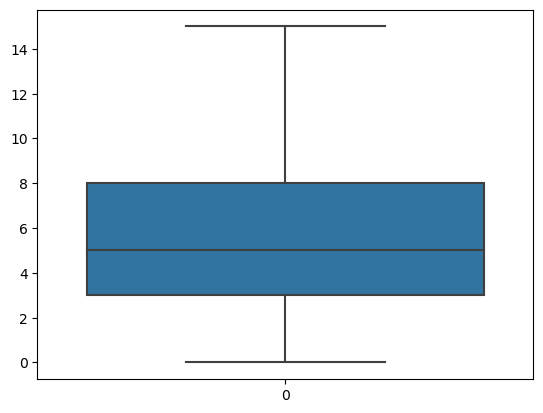

In [91]:
sns.boxplot(df.YearsAtCompany)

## 6.Splitting Dependent and Independent variables

In [92]:
x = df.drop(columns="Attrition")
y = df["Attrition"]

In [93]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,1,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [94]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [95]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## 7.Encoding

In [96]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [97]:
x.BusinessTravel=le.fit_transform(x.BusinessTravel)

In [98]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}

In [99]:
x.Department=le.fit_transform(x.Department)

In [100]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}

In [101]:
x.Gender=le.fit_transform(x.Gender)

In [102]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'Female': 0, 'Male': 1}

In [103]:
x.JobRole=le.fit_transform(x.JobRole)

In [104]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'Healthcare Representative': 0,
 'Human Resources': 1,
 'Laboratory Technician': 2,
 'Manager': 3,
 'Manufacturing Director': 4,
 'Research Director': 5,
 'Research Scientist': 6,
 'Sales Executive': 7,
 'Sales Representative': 8}

In [105]:
x.MaritalStatus=le.fit_transform(x.MaritalStatus)

In [106]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'Divorced': 0, 'Married': 1, 'Single': 2}

In [107]:
x.OverTime=le.fit_transform(x.OverTime)

In [108]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'No': 0, 'Yes': 1}

In [109]:
x.EducationField=le.fit_transform(x.EducationField)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,1,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2


In [110]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'Human Resources': 0,
 'Life Sciences': 1,
 'Marketing': 2,
 'Medical': 3,
 'Other': 4,
 'Technical Degree': 5}

In [111]:
y=le.fit_transform(y)

In [112]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'No': 0, 'Yes': 1}

In [113]:
y

array([1, 0, 1, ..., 0, 0, 0])

## 8.Feature Scaling

In [114]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [115]:
x_scaled

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.0,0.914286,...,0.0,0.000000,0.000000,0.5000,0.000000,0.000000,0.400000,0.222222,0.0,0.357143
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,0.442857,...,1.0,1.000000,0.333333,0.6250,0.500000,0.666667,0.666667,0.388889,0.5,0.500000
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,0.885714,...,0.0,0.333333,0.000000,0.4375,0.500000,0.666667,0.000000,0.000000,0.0,0.000000
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.0,0.371429,...,0.0,0.666667,0.000000,0.5000,0.500000,0.666667,0.533333,0.388889,0.5,0.000000
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,1.0,0.142857,...,0.0,1.000000,0.333333,0.3750,0.500000,0.666667,0.133333,0.111111,1.0,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.559771,0.5,0.785714,0.25,0.6,0.666667,1.0,0.157143,...,0.0,0.666667,0.333333,0.6250,0.500000,0.666667,0.333333,0.111111,0.0,0.214286
1466,0.500000,1.0,0.365784,0.5,0.178571,0.00,0.6,1.000000,1.0,0.171429,...,0.0,0.000000,0.333333,0.5625,0.833333,0.666667,0.466667,0.388889,0.5,0.500000
1467,0.214286,1.0,0.037938,0.5,0.107143,0.50,0.2,0.333333,1.0,0.814286,...,1.0,0.333333,0.333333,0.3750,0.000000,0.666667,0.400000,0.111111,0.0,0.214286
1468,0.738095,0.5,0.659270,1.0,0.035714,0.50,0.6,1.000000,1.0,0.471429,...,0.0,1.000000,0.000000,0.6250,0.500000,0.333333,0.600000,0.333333,0.0,0.571429


## 9.Splitting Data into Train and Test

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [117]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1176, 30), (294, 30), (1176,), (294,))

In [118]:
x_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1374,0.952381,1.0,0.360057,1.0,0.714286,0.50,0.2,1.000000,0.0,0.600000,...,0.0,0.666667,0.333333,0.6250,0.333333,0.333333,0.066667,0.000000,0.0,0.000000
1092,0.642857,1.0,0.607015,0.5,0.964286,0.50,1.0,1.000000,1.0,0.957143,...,1.0,1.000000,0.333333,0.5000,0.500000,0.666667,0.333333,0.222222,0.0,0.214286
768,0.523810,1.0,0.141732,1.0,0.892857,0.50,0.4,0.666667,1.0,0.628571,...,0.0,0.333333,0.333333,0.5000,0.500000,0.333333,0.466667,0.388889,0.5,0.357143
569,0.428571,0.0,0.953472,1.0,0.250000,0.75,0.2,0.000000,1.0,0.657143,...,0.0,0.333333,0.000000,0.6250,0.166667,0.666667,0.666667,0.388889,0.0,0.642857
911,0.166667,0.5,0.355762,1.0,0.821429,0.00,0.2,0.666667,1.0,0.614286,...,0.0,1.000000,0.000000,0.0625,0.666667,0.666667,0.066667,0.000000,0.5,0.000000


## 10.a-Model Building using Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [120]:
model.fit(x_train,y_train)

LogisticRegression()

In [121]:
pred=model.predict(x_test)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

In [122]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0])

In [123]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [124]:
model.predict(ms.transform([[29,2,153,1,15,2,4,4,0,49,2,2,7,3,2,4193,12682,0,1,12,3,4,0,10,3,3,9,5,0,8]]))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

## Evaluation of classification model

In [125]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [126]:
accuracy_score(y_test,pred)

0.8673469387755102

In [127]:
confusion_matrix(y_test,pred)

array([[239,   6],
       [ 33,  16]])

In [128]:
pd.crosstab(y_test,pred)

col_0,0,1
row_0,,
0,239,6
1,33,16


In [129]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       245
           1       0.73      0.33      0.45        49

    accuracy                           0.87       294
   macro avg       0.80      0.65      0.69       294
weighted avg       0.85      0.87      0.85       294



###  Roc-AUC curve

In [130]:
probability=model.predict_proba(x_test)[:,1]
probability

array([0.06592084, 0.25863542, 0.28739085, 0.02468349, 0.71267516,
       0.08708681, 0.31099995, 0.05907733, 0.0218311 , 0.35730349,
       0.08641574, 0.36961717, 0.02094335, 0.6361588 , 0.41542618,
       0.01299046, 0.12056925, 0.21073937, 0.06618179, 0.12716986,
       0.30190163, 0.05563461, 0.0350065 , 0.04468465, 0.64079092,
       0.20870136, 0.06480941, 0.04162981, 0.73274243, 0.03022394,
       0.01199807, 0.03430539, 0.09761587, 0.31718717, 0.07030132,
       0.04203005, 0.06958003, 0.07901765, 0.03461088, 0.05813314,
       0.05277492, 0.01976596, 0.07794785, 0.02361465, 0.0229007 ,
       0.49530711, 0.34724341, 0.00526593, 0.81092506, 0.35775056,
       0.13319326, 0.57854944, 0.05114352, 0.25226034, 0.56431525,
       0.20829048, 0.02116349, 0.31800882, 0.03494116, 0.13661463,
       0.02506214, 0.21826143, 0.08954686, 0.04378263, 0.44664932,
       0.01678427, 0.2287622 , 0.10408233, 0.0834239 , 0.11193702,
       0.12003039, 0.31385003, 0.08309689, 0.0763127 , 0.13653

In [131]:
fpr,tpr,threshsholds = roc_curve(y_test,probability)

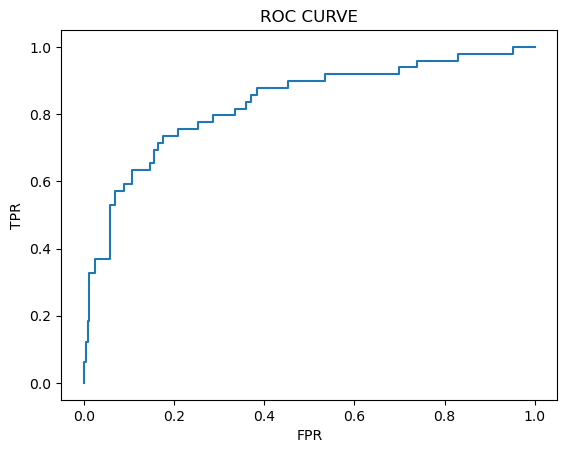

In [132]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

## 10.b-Model Building using Decision Tree Classification

In [133]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [134]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [135]:
pred=dtc.predict(x_test)

In [136]:
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0])

In [137]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0])

In [138]:
model.predict(ms.transform([[29,2,153,1,15,2,4,4,0,49,2,2,7,3,2,4193,12682,0,1,12,3,4,0,10,3,3,9,5,0,8]]))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [139]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [140]:
accuracy_score(y_test,pred)

0.7551020408163265

In [141]:
confusion_matrix(y_test,pred)

array([[204,  41],
       [ 31,  18]])

In [142]:
pd.crosstab(y_test,pred)

col_0,0,1
row_0,,
0,204,41
1,31,18


In [143]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       245
           1       0.31      0.37      0.33        49

    accuracy                           0.76       294
   macro avg       0.59      0.60      0.59       294
weighted avg       0.77      0.76      0.76       294



### Roc-AUC curve

In [144]:
probability=dtc.predict_proba(x_test)[:,1]

In [145]:
probability

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [146]:
# roc_curve
fpr,tpr,threshsholds = roc_curve(y_test,probability)

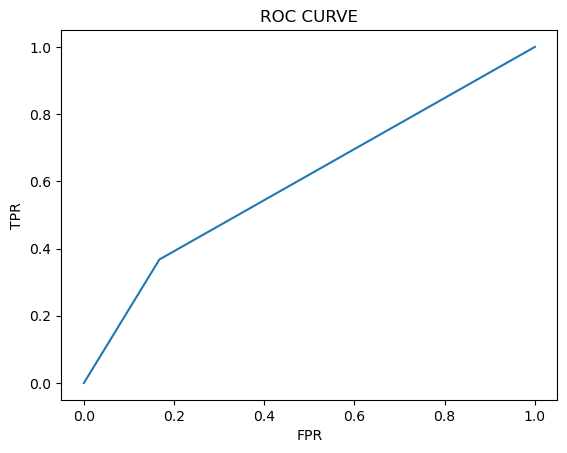

In [147]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

[Text(0.3188430642633229, 0.9705882352941176, 'X[23] <= 0.094\ngini = 0.269\nsamples = 1176\nvalue = [988, 188]'),
 Text(0.07523510971786834, 0.9117647058823529, 'X[14] <= 0.75\ngini = 0.5\nsamples = 78\nvalue = [39, 39]'),
 Text(0.047021943573667714, 0.8529411764705882, 'X[4] <= 0.554\ngini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(0.03134796238244514, 0.7941176470588235, 'X[13] <= 0.167\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.018808777429467086, 0.7352941176470589, 'X[18] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.012539184952978056, 0.6764705882352942, 'X[14] <= 0.25\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.006269592476489028, 0.6176470588235294, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.018808777429467086, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.025078369905956112, 0.6764705882352942, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.0438871473354232, 0.7352941176470589, 'X[17] <= 0.056

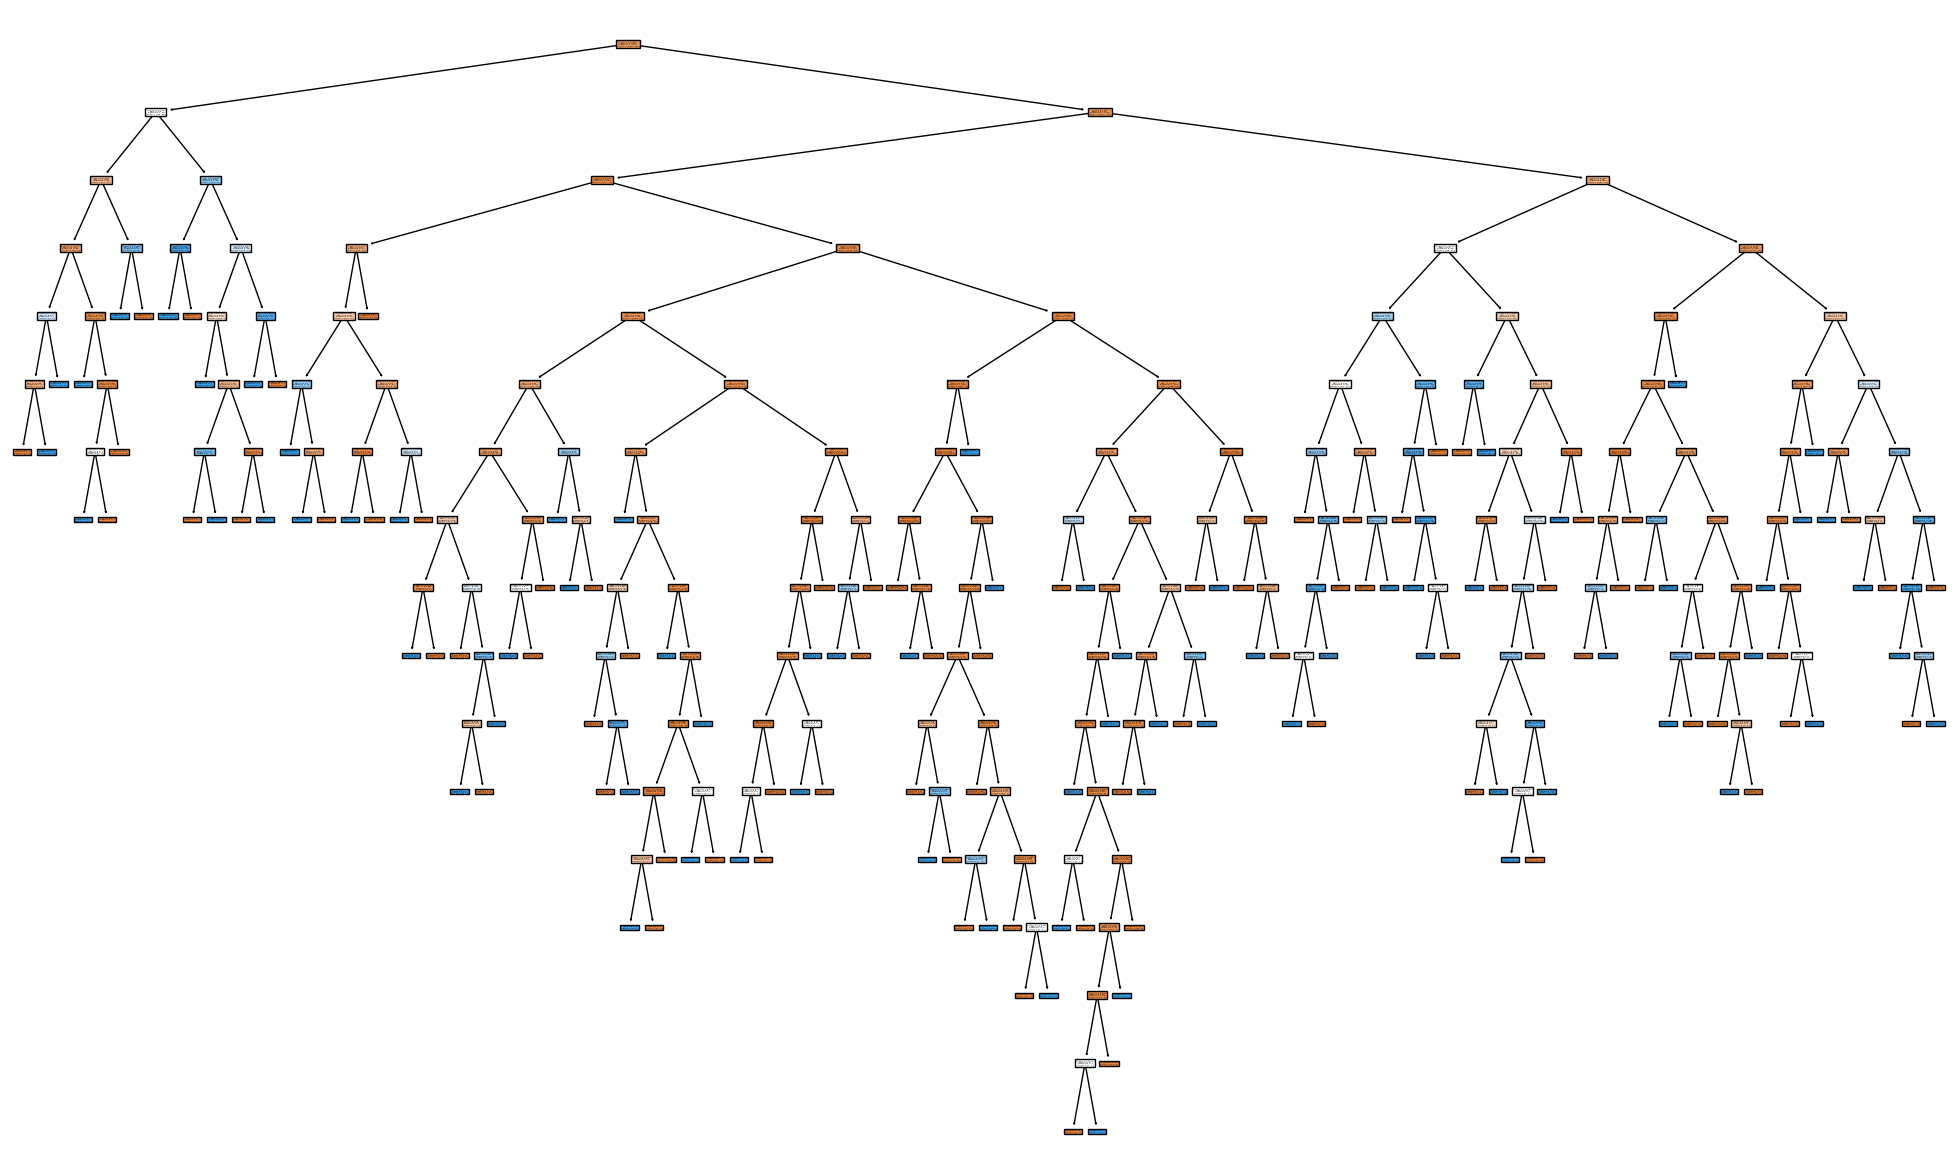

In [148]:
#Hyper parameter tuning
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtc,filled=True)

In [149]:
from sklearn.model_selection import GridSearchCV
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [150]:
grid_search=GridSearchCV(estimator=dtc,param_grid=parameter,cv=5,scoring="accuracy")

In [151]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [152]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'splitter': 'random'}

In [153]:
dtc_cv=DecisionTreeClassifier(criterion= 'gini',
 max_depth=4,
 max_features='auto',
 splitter='best')
dtc_cv.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='auto')

In [154]:
pred=dtc_cv.predict(x_test)

In [155]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       245
           1       0.52      0.27      0.35        49

    accuracy                           0.84       294
   macro avg       0.69      0.61      0.63       294
weighted avg       0.81      0.84      0.81       294



## 10.c-Model Building using Random Forest Classification

In [156]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [157]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [158]:
rfc_cv= GridSearchCV(rfc,param_grid=forest_params,cv=10,scoring="accuracy")

In [159]:
rfc_cv.fit(x_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.9/site-packages/j

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [160]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train) 
probability = rfc.predict_proba(x_test)[:, 1]

In [161]:
fpr, tpr, _ = roc_curve(y_test, probability)

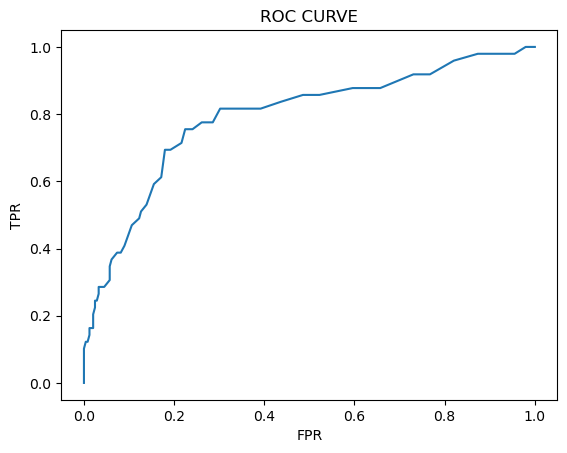

In [162]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [163]:
pred=rfc_cv.predict(x_test)

In [164]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       245
           1       0.70      0.14      0.24        49

    accuracy                           0.85       294
   macro avg       0.78      0.57      0.58       294
weighted avg       0.83      0.85      0.80       294



In [165]:
rfc_cv.best_params_

{'max_depth': 11, 'max_features': 6}

# Accuracies:-
    Logistic Regression - 87%
    Decision Tree       - 84%
    Random Forest       - 85%